In [1]:
import matplotlib.pyplot as plt
import pickle as pkl
import numpy as np
import scipy
from scipy import stats


# Plots and figures
This notebook is used to plot the results of the algorithms.

In [5]:
# select the most probable entry of a dictionary and convert it to an integer
def most_probable(dic):
    m = list(dic)[0]
    for n in list(dic):
        if dic[n]>dic[m]:
            m=n
    return m

def prepare_data(results,method='None'):
    '''
    Auxiliary function to prepare the data for plotting.
    Input: results: list of dictionaries with the results of the algorithm
           method: 'most probable' or 'circular' to select the most probable entry or to compute the circular mean
    '''
    if method == 'most probable':
        results_most_probable = [most_probable(results[i]) for i in range(len(results))]
        phase = [int(results_most_probable[i],base=2)/2**(3) for i in range(len(results_most_probable))]
        return phase
    if method == 'circular':
        phase_circular = [np.sum([results[i][j]*np.exp(1j*int(j,2)) for j in results[i].keys()],dtype=complex) for i in range(len(results))]
        phase_circular = [np.angle(phase_circular[i])/(2*np.pi) for i in range(len(phase_circular))]
        return phase_circular
    else:
        print('No method selected')
        return results
    
def plot_and_save(tau, phase ,tau_1,phase_1, xlabel, ylabel, save_path,name = None, regression = False,
                  regression_lim = None, regression_lim_1 = None):
    '''
    Auxiliary function to plot and save the data.
    Input: tau: list of tau values for the state (1/sqrt(2)|01>-|10>)
           phase: list of phases retrieved for the state (1/sqrt(2)|01>-|10>)
           tau_1: list of tau values for the state (1/sqrt(2)|01>+|10>)
           phase_1: list of phases retrieved for the state (1/sqrt(2)|01>+|10>)
           xlabel: label for the x axis
           ylabel: label for the y axis
           save_path: path to save the figure
           name: name of the figure
           regression: boolean to plot the regression line
           regression_lim: list of two elements with the limits of the regression line for the state (1/sqrt(2)|01>-|10>)
           regression_lim_1: list of two elements with the limits of the regression line for the state (1/sqrt(2)|01>+|10>)
    '''
    # plot the data
    plt.figure(figsize=(10, 6))
    plt.plot(tau,phase, label = r'State $\frac{1}{\sqrt{2}}|01\rangle -|10\rangle $', color = 'darkblue')  
    plt.plot(tau_1,phase_1, label = r'State $\frac{1}{\sqrt{2}}|01\rangle + |10\rangle $', color = 'r')
    
    # plot the regression line
    if regression:
        # Determine the regression line
        slope, intercept, r_value, p_value, std_err = stats.linregress(tau[regression_lim[0]:regression_lim[1]]
                                                                       ,phase[regression_lim[0]:regression_lim[1]])
        # Plot the regression line
        plt.plot(tau[regression_lim[0]:regression_lim[1]], [intercept + slope*x for x in tau[regression_lim[0]:regression_lim[1]]], 'b',
                 linestyle='dashed', label=fr'{round(slope,3)}$\tau$+{round(intercept,3)}')
        
        print('slope: ',slope,'intercept: ',intercept,'r_value: ',r_value,'p_value: ',p_value,'std_err: ',std_err)
        
        slope, intercept, r_value, p_value, std_err = stats.linregress(tau_1[regression_lim_1[0]:regression_lim_1[1]],
                                                                       phase_1[regression_lim_1[0]:regression_lim_1[1]])
        plt.plot(tau_1[regression_lim_1[0]:regression_lim_1[1]], [intercept + slope*x for x in tau_1[regression_lim_1[0]:regression_lim_1[1]]]
                 , 'lightcoral',linestyle='dashed', label=fr'{round(slope,3)}$\tau$+{round(intercept,3)}')
        print('slope: ',slope,'intercept: ',intercept,'r_value: ',r_value,'p_value: ',p_value,'std_err: ',std_err)
     
    # Figure settings    
    plt.xlabel(r'$\tau$', fontsize=18)
    plt.ylabel(r'$\phi$', fontsize=18)
    plt.rcParams['font.size'] = 16
    plt.rcParams['axes.labelsize'] = 16
    plt.rcParams['legend.fontsize'] = 16
    plt.rcParams['axes.linewidth'] = 2
    plt.legend()
    # Save the figure
    plt.savefig(f'{save_path}/{name}.pdf', bbox_inches='tight',format='pdf')
    plt.close()


def plot_data(tau, results,tau_1,results_1, xlabel, ylabel, save_path, algorithm = None,name = None, regression = False,
              regression_lim = None, regression_lim_1 = None):
    '''
    Main function to plot the data.
    Input: tau: list of tau values for the state (1/sqrt(2)|01>-|10>)
           results: list of dictionaries or floats, depending on the algorithm,
                    with the results of the algorithm for the state (1/sqrt(2)|01>-|10>)
           tau_1: list of tau values for the state (1/sqrt(2)|01>+|10>)
           results_1: list of dictionaries or floats, depending on the algorithm,
                    with the results of the algorithm for the state (1/sqrt(2)|01>+|10>)
           xlabel: label for the x axis
           ylabel: label for the y axis
           save_path: path to save the figure
           algorithm: 'qpea' or 'qpea_circular' or 'ipea' to select the algorithm and the method to prepare the data
           name: name of the figure
           regression: boolean to plot the regression line
           regression_lim: list of two elements with the limits of the regression line for the state (1/sqrt(2)|01>-|10>)
           regression_lim_1: list of two elements with the limits of the regression line for the state (1/sqrt(2)|01>+|10>)
    '''
    # If the algorithm is qpea 
    if algorithm == 'qpea':
        # prepare the data with the most probable entry of the dictionary
        phase = prepare_data(results,method='most probable')
        phase_1 = prepare_data(results_1,method='most probable')
        # plot and save the data
        plot_and_save(tau, phase ,tau_1,phase_1, xlabel, ylabel, save_path,name = name, regression = regression,
                      regression_lim = regression_lim, regression_lim_1 = regression_lim_1)
        
    # If the algorithm is qpea_circular   
    if algorithm == 'qpea_circular':
        # prepare the data with the circular mean
        phase_circular = prepare_data(results,method='circular')
        phase_circular_1 = prepare_data(results_1,method='circular')
        # plot and save the data
        plot_and_save(tau, phase_circular ,tau_1,phase_circular_1, xlabel, ylabel, save_path,name = 'circular_'+name, regression = regression,
                      regression_lim = regression_lim, regression_lim_1 = regression_lim_1)
        
    # If the algorithm is ipea
    if algorithm == 'ipea':
        phase = prepare_data(results,method='None')
        phase_1 = prepare_data(results_1,method='None')
        # plot and save the data
        plot_and_save(tau, phase ,tau_1,phase_1, xlabel, ylabel, save_path,name = name, regression = regression,
                      regression_lim = regression_lim, regression_lim_1 = regression_lim_1)

# Function to open the data
def open_data(tau_file,results_file,tau_file_1,results_file_1):
    with open(tau_file, 'rb') as f:
        tau = pkl.load(f)
    with open(results_file, 'rb') as f:
        results = pkl.load(f)
    with open(tau_file_1, 'rb') as f:
        tau_1 = pkl.load(f)
    with open(results_file_1, 'rb') as f:
        results_1 = pkl.load(f)
    return tau, results, tau_1, results_1
        
        

# QPEA figures
## Simulator

In [6]:
tau, results, tau_1, results_1 = open_data('tau_qpea_simulator.pkl','resposta_qpea_simulator.pkl','tau_qpea_simulator_1.pkl'
                                           ,'resposta_qpea_simulator_1.pkl')

/home/mgabijo/miniconda3/envs/phase/lib/python3.7/site-packages/qiskit/version.py:20: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  import pkg_resources


In [7]:
plot_data(tau, results,tau_1,results_1, r'$\tau$', r'$\phi$', 'figures', algorithm = 'qpea',name = 'qpea_simulator', regression = True,
          regression_lim_1 = [2,len(tau)], regression_lim = [0,10])

slope:  0.46299619808551373 intercept:  0.013636363636363613 r_value:  0.9925164910917023 p_value:  1.3598586304023192e-08 std_err:  0.020139482279893046
slope:  -0.15614955418293502 intercept:  0.9890530925013683 r_value:  -0.9906613412063898 p_value:  4.951360159174532e-24 std_err:  0.00421473044240742


In [9]:
# circular
plot_data(tau, results ,tau_1,results_1, r'$\tau$', r'$\phi$', 'figures', algorithm='qpea_circular',name = 'circular_qpea_simulator', regression = True,
                regression_lim = [5,15], regression_lim_1 = [-12,len(tau)])

slope:  0.396491712654556 intercept:  -0.7181115737026792 r_value:  0.9741744457631257 p_value:  1.8864856408056974e-06 std_err:  0.03249151605028678
slope:  -0.19981035773612874 intercept:  1.2572704921606688 r_value:  -0.9894506003749355 p_value:  1.0109693622985218e-09 std_err:  0.00925133341381923


## Brisbane device

In [10]:
tau, results, tau_1, results_1 = open_data('tau_qpea_qpea_brisbane.pkl','resposta_qpea_brisbane.pkl','tau_qpea_brisbane_1.pkl'
                                           ,'resposta_qpea_brisbane_1.pkl')

In [11]:
plot_data(tau, results,tau_1,results_1, r'$\tau$', r'$\phi$', 'figures', algorithm = 'qpea',name = 'qpea_brisbane')

In [12]:
#circular
plot_data(tau, results,tau_1,results_1, r'$\tau$', r'$\phi$', 'figures', algorithm = 'qpea_circular',name = 'qpea_brisbane')

# IPEA Figures
## Simulator

In [13]:
tau, results, tau_1, results_1 = open_data('tau_ipea_simulator.pkl','resposta_ipea_simulator.pkl','tau_ipea_simulator_1.pkl', 'resposta_ipea_simulator_1.pkl')

In [14]:
plot_data(tau, results,tau_1,results_1, r'$\tau$', r'$\phi$', 'figures', algorithm = 'ipea',name = 'ipea_simulator', regression = True,
          regression_lim_1 = [2,len(tau)], regression_lim = [0,10])

No method selected
No method selected
slope:  0.46299619808551373 intercept:  0.013636363636363613 r_value:  0.9925164910917023 p_value:  1.3598586304023192e-08 std_err:  0.020139482279893046
slope:  -0.15614955418293502 intercept:  0.9890530925013683 r_value:  -0.9906613412063898 p_value:  4.951360159174532e-24 std_err:  0.00421473044240742


## Brisbane

In [15]:
# Brisbane
tau, results, tau_1, results_1 = open_data('tau_ipea_brisbane.pkl','resposta_ipea_brisbane.pkl','tau_ipea_brisbane_1.pkl', 'resposta_ipea_brisbane_1.pkl')

In [16]:
plot_data(tau, results,tau_1,results_1, r'$\tau$', r'$\phi$', 'figures', algorithm = 'ipea',name = 'ipea_brisbane', regression = True,
          regression_lim_1 = [2,len(tau)], regression_lim = [2,10])

No method selected
No method selected
slope:  0.45472840883398674 intercept:  -0.023809523809523836 r_value:  0.9683640522700839 p_value:  7.728952361388356e-05 std_err:  0.04783887302742056
slope:  -0.16529638999281412 intercept:  1.0098180076628354 r_value:  -0.9840689763221884 p_value:  4.944858831860119e-21 std_err:  0.005856678430591098


# VQE figures

In [2]:
# Open the data for the noise
with open('vqe_noise_brisbane.pkl', 'rb') as f:
    vqe_noise = pkl.load(f)
energy_noise = vqe_noise['Energy_values']

# Open the data for the simulator
with open('vqe_simulator.pkl', 'rb') as f:
    vqe_simulator = pkl.load(f)
energy_simulator = vqe_simulator['Energy_values']

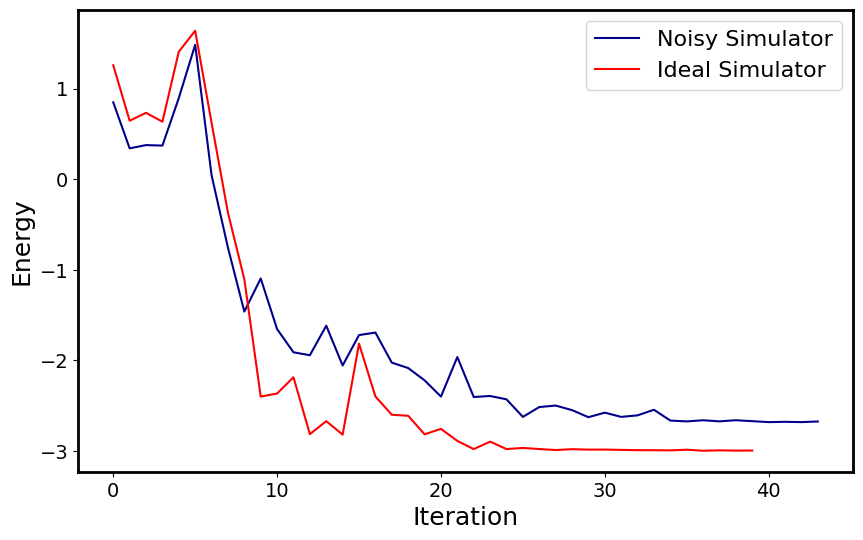

In [4]:
plt.figure(figsize=(10, 6))
plt.plot(energy_noise, label = r'Noisy Simulator', color = 'darkblue')
    
plt.plot(energy_simulator, label = r'Ideal Simulator', color = 'r')

# Figure settings
plt.xlabel(r'Iteration', fontsize=18)
plt.ylabel(r'Energy', fontsize=18)
plt.rcParams['font.size'] = 16
plt.rcParams['legend.fontsize'] = 16
plt.rcParams['axes.linewidth'] = 2
plt.legend()
plt.savefig(f'figures/vqe.pdf', bbox_inches='tight',format='pdf')
#plt.close()
        

In [3]:
print('Minimum energy value for noisy simulator: ', vqe_noise['Energy_found'])
print('Minimum energy value for ideal simulator: ', vqe_simulator['Energy_found'])

Minimum energy value for noisy simulator:  -2.676
Minimum energy value for ideal simulator:  -2.9969
